In [1]:
# Prevendo Despesas Hospitalares 

In [2]:
#Importação de pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Lendo o arquivo do projeto

dataset = pd.read_csv ('dataset.csv')

#Primeiras linhas do dataset 
dataset.head()


,idade,sexo,bmi,filhos,fumante,regiao,gastos
0,19,mulher,27.9,0,sim,sudeste,16884.92
1,18,homem,33.8,1,nao,sul,1725.55
2,28,homem,33.0,3,nao,sul,4449.46
3,33,homem,22.7,0,nao,nordeste,21984.47
4,32,homem,28.9,0,nao,nordeste,3866.86


In [4]:
#Verificando o tipo das variáveis

dataset.dtypes



idade        int64
sexo        object
bmi        float64
filhos       int64
fumante     object
regiao      object
gastos     float64
dtype: object

In [5]:
#Verificando valores nulos

dataset.isnull().sum().sort_values(ascending = False)

#Nenhum valor nulo

gastos     0
regiao     0
fumante    0
filhos     0
bmi        0
sexo       0
idade      0
dtype: int64

In [6]:
#Verificando valores zero

(dataset==0).sum()

#Valores 0 em ''filhos'' são permitidos, portanto, não serão tratados.

idade        0
sexo         0
bmi          0
filhos     574
fumante      0
regiao       0
gastos       0
dtype: int64

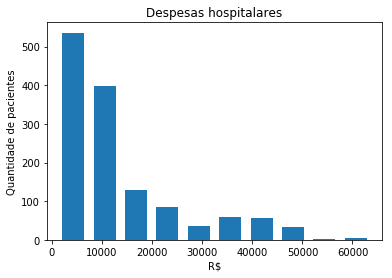

In [7]:
#Analisando os dados

plt.hist(dataset['gastos'], histtype = 'bar', rwidth = 0.7)

plt.title('Despesas hospitalares')
plt.xlabel('R$')
plt.ylabel('Quantidade de pacientes')

plt.show()

#A maioria das despesas hospitalares são de até R$ 10000,00.

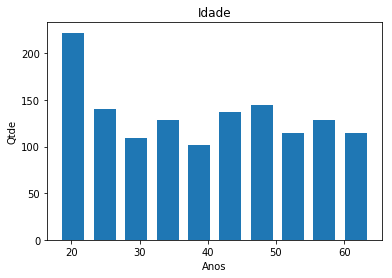

In [8]:
plt.hist(dataset['idade'], histtype = 'bar', rwidth = 0.7)

plt.title('Idade')
plt.xlabel('Anos')
plt.ylabel('Qtde')

plt.show()

#O grupo mais representativo da amostra está na faixa dos 20 anos de idade, porém todas as faixas etárias (até aproximadamente 70 anos)
#estão bem representadas.



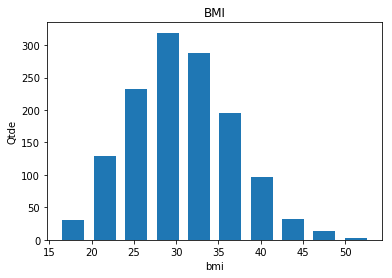

In [9]:
plt.hist(dataset['bmi'], histtype = 'bar', rwidth = 0.7)

plt.title('BMI')
plt.xlabel('bmi')
plt.ylabel('Qtde')

#Considerando que a grande parte da amostra possui BMI igual ou maior que 25, pode-se afirmar que parte de significativa das pessoas
#está perto ou ultrapassou a marca do sobrepeso (bmi > 30)

plt.show()

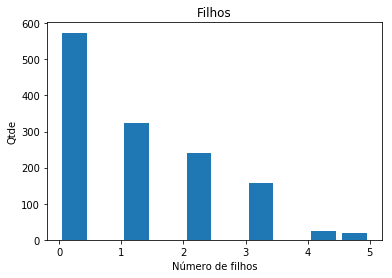

In [10]:
plt.hist(dataset['filhos'], histtype = 'bar', rwidth = 0.8)

plt.title('Filhos')
plt.xlabel('Número de filhos')
plt.ylabel('Qtde')

plt.show()

#Na amostra do projeto, pacientes com 4 ou 5 filhos são raros. Em contramão, a maioria possui até 1 filho. Quanto maior a quantidade
#de filhos, menor o número de pacientes do estudo.

In [11]:
### Construção dos Gráficos de Pizza para as variáveis categóricas

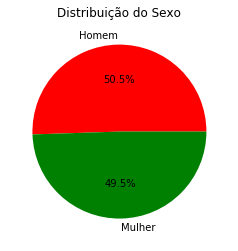

In [12]:
dataset['sexo'].value_counts()

quantia = [676, 662]
tipos = ['Homem', 'Mulher']
cor = ['r', 'g']

plt.pie(quantia, labels = tipos, colors = cor, autopct='%.1f%%')
plt.title ("Distribuição do Sexo")
plt.subplots_adjust(wspace=1)

plt.show()



#Predominância de não fumantes no estudo.

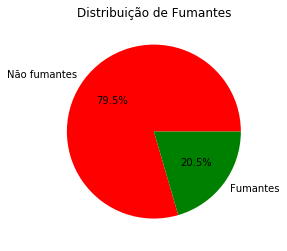

In [13]:
dataset['fumante'].value_counts()

quantia = [1064, 274]
tipos = ['Não fumantes', 'Fumantes']
cor = ['r', 'g']

plt.pie(quantia, labels = tipos, colors = cor, autopct='%.1f%%')
plt.title ("Distribuição de Fumantes")
plt.show()

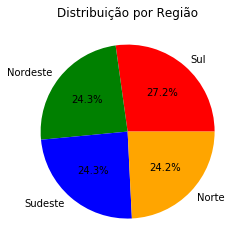

In [14]:
dataset['regiao'].value_counts()

quantia = [364, 325,325, 324]
tipos = ['Sul', 'Nordeste', 'Sudeste', 'Norte']
cor = ['r', 'g', 'b', 'orange']

plt.pie(quantia, labels = tipos, colors = cor, autopct='%.1f%%')
plt.title ("Distribuição por Região")
plt.show()

In [15]:
#Verificando a relação das variáveis categóricas com a variável preditora

In [16]:
import seaborn as sns

Text(0.5, 1.0, 'Sexo x Gastos')

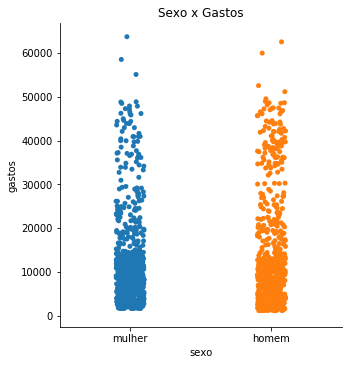

In [17]:
sns.catplot(x="sexo", y="gastos", data=dataset)
plt.title ('Sexo x Gastos')

#O sexo não interefere no gasto hospitalar médio.

Text(0.5, 1.0, 'Fumante x Gastos')

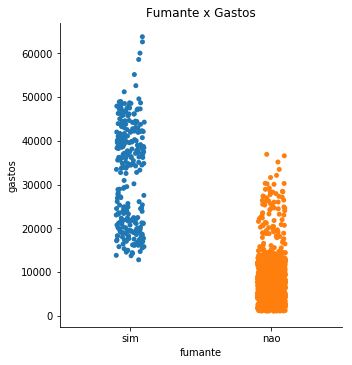

In [18]:
sns.catplot(x="fumante", y="gastos", data=dataset)
plt.title ('Fumante x Gastos')

#Por mais que seja uma deduão lógica, o gráfico abaixo comprova que fumantes tem uma média de gastos maiores no setor hospitalar
#em relação aos não fumantes.

Text(0.5, 1.0, 'Região x Gastos')

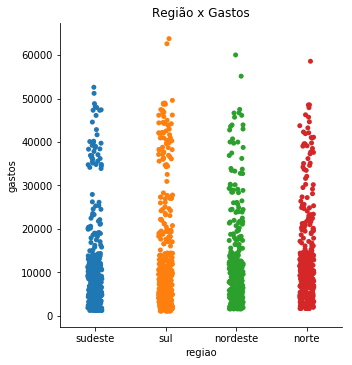

In [19]:
sns.catplot(x="regiao", y="gastos", data=dataset)
plt.title ('Região x Gastos')

#A região não interefere na média de gastos hospitalares.

In [20]:
#Verificando a relação das variáveis numéricas com a variável target

Text(0, 0.5, 'Gastos')

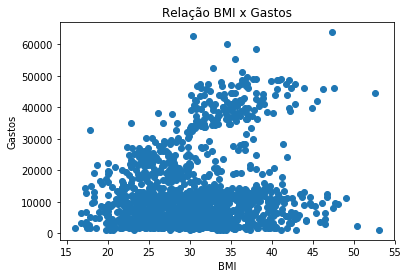

In [21]:
plt.scatter ('bmi', 'gastos', data= dataset)
plt.title('Relação BMI x Gastos')
plt.xlabel('BMI')
plt.ylabel('Gastos')

#Este gráfico nos mostra que pacientes com índice de massa corpórea (BMI) alto (entre 30 e 40) possúem mais registros de altos
#gastos hospitalares, com um número significativo de despesas acima dos 35 mil.

Text(0, 0.5, 'Gastos')

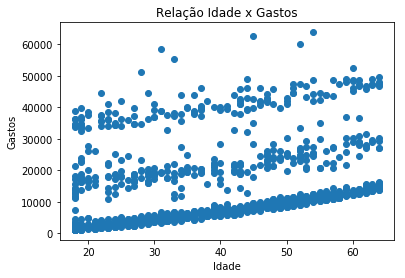

In [22]:
plt.scatter ('idade', 'gastos', data= dataset)
plt.title('Relação Idade x Gastos')
plt.xlabel('Idade')
plt.ylabel('Gastos')

#Como pode ser visto no crescimento da curva, a idade possui relação proporcional com os gastos. Quanto maior a idade, maior 
# a probabilidade de despesas hospitalares significativas.

Text(0, 0.5, 'Gastos')

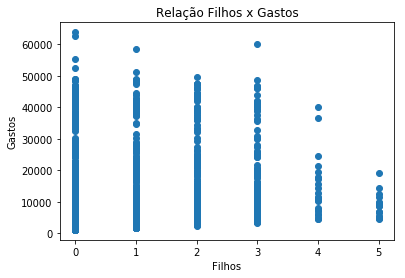

In [23]:
plt.scatter ('filhos', 'gastos', data= dataset)
plt.title('Relação Filhos x Gastos')
plt.xlabel('Filhos')
plt.ylabel('Gastos')



In [24]:
# A seguir, o processo de limpeza e tratamento dos dados será feito para que o modelo preditivo seja construído. Neste trabalho
#Serão testados dois tipos de algoritmos: o de regressão linear, e o RandomForest.

In [25]:
#Preparando os dados para o modelo Preditivo

#1 - One-Hot Encoding das variáveis 'sexo', 'fumante' e 'regiao' em variáveis categóricas.
#2 - Normalização das colunas numéricas.

In [26]:
#1 - Transformação das variáveis categóricas

dataset2 = pd.get_dummies(dataset)

In [27]:
dataset2.head()

,idade,bmi,filhos,gastos,sexo_homem,sexo_mulher,fumante_nao,fumante_sim,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,19,27.9,0,16884.92,0,1,0,1,0,0,1,0
1,18,33.8,1,1725.55,1,0,1,0,0,0,0,1
2,28,33.0,3,4449.46,1,0,1,0,0,0,0,1
3,33,22.7,0,21984.47,1,0,1,0,1,0,0,0
4,32,28.9,0,3866.86,1,0,1,0,1,0,0,0


In [28]:
#2 - Normalização das colunas numéricas

#Criando um data.frame sem as colunas que serão normalizadas

df = dataset2.drop(['idade', 'bmi', 'filhos'], axis = 1)
df.head()

,gastos,sexo_homem,sexo_mulher,fumante_nao,fumante_sim,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,16884.92,0,1,0,1,0,0,1,0
1,1725.55,1,0,1,0,0,0,0,1
2,4449.46,1,0,1,0,0,0,0,1
3,21984.47,1,0,1,0,1,0,0,0
4,3866.86,1,0,1,0,1,0,0,0


In [29]:
#Normalizando os dados numéricos

from sklearn import preprocessing

x = dataset2[['idade', 'bmi', 'filhos']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df_numerico = pd.DataFrame(x_scaled)

df_numerico.head()

,0,1,2
0,0.021739,0.320755,0.0
1,0.000000,0.479784,0.2
2,0.217391,0.458221,0.6
3,0.326087,0.180593,0.0
4,0.304348,0.347709,0.0


In [30]:
#Unindo os dois Dataframes novamente

datasetfinal = pd.concat([df_numerico, df], axis = 1)
datasetfinal.head()

,0,1,2,gastos,sexo_homem,sexo_mulher,fumante_nao,fumante_sim,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,0.021739,0.320755,0.0,16884.92,0,1,0,1,0,0,1,0
1,0.000000,0.479784,0.2,1725.55,1,0,1,0,0,0,0,1
2,0.217391,0.458221,0.6,4449.46,1,0,1,0,0,0,0,1
3,0.326087,0.180593,0.0,21984.47,1,0,1,0,1,0,0,0
4,0.304348,0.347709,0.0,3866.86,1,0,1,0,1,0,0,0


In [31]:
#Dando nome para as colunas que foram normalizadas.

datasetfinal = datasetfinal.rename(columns ={0: 'idade', 1: 'bmi', 2:'filhos'})
datasetfinal.head()

,idade,bmi,filhos,gastos,sexo_homem,sexo_mulher,fumante_nao,fumante_sim,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,0.021739,0.320755,0.0,16884.92,0,1,0,1,0,0,1,0
1,0.000000,0.479784,0.2,1725.55,1,0,1,0,0,0,0,1
2,0.217391,0.458221,0.6,4449.46,1,0,1,0,0,0,0,1
3,0.326087,0.180593,0.0,21984.47,1,0,1,0,1,0,0,0
4,0.304348,0.347709,0.0,3866.86,1,0,1,0,1,0,0,0


In [32]:
#Com os dado organizados, limpos e normalizados, dá-se inicio ao processo de construção do modelo preditivo.

In [33]:
#Verificando a importância das variáveis

In [34]:
#Verificando a correlação de forma gráfica utilizado o dataset inteiro

datasetfinal.corr()

,idade,bmi,filhos,gastos,sexo_homem,sexo_mulher,fumante_nao,fumante_sim,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
idade,1.000000,0.109341,0.042469,0.299008,-0.020856,0.020856,0.025019,-0.025019,-0.000407,0.002475,0.010016,-0.011642
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,-0.046380,-0.003968,0.003968,-0.135992,-0.138091,-0.006398,0.270144
filhos,0.042469,0.012645,1.000000,0.067998,0.017163,-0.017163,-0.007673,0.007673,0.024806,-0.022808,0.021914,-0.023066
gastos,0.299008,0.198576,0.067998,1.000000,0.057292,-0.057292,-0.787251,0.787251,-0.039905,0.006349,-0.043210,0.073982
sexo_homem,-0.020856,0.046380,0.017163,0.057292,1.000000,-1.000000,-0.076185,0.076185,-0.011156,-0.002425,-0.004184,0.017117
sexo_mulher,0.020856,-0.046380,-0.017163,-0.057292,-1.000000,1.000000,0.076185,-0.076185,0.011156,0.002425,0.004184,-0.017117
fumante_nao,0.025019,-0.003968,-0.007673,-0.787251,-0.076185,0.076185,1.000000,-1.000000,0.036945,-0.002811,0.036945,-0.068498
fumante_sim,-0.025019,0.003968,0.007673,0.787251,0.076185,-0.076185,-1.000000,1.000000,-0.036945,0.002811,-0.036945,0.068498
regiao_nordeste,-0.000407,-0.135992,0.024806,-0.039905,-0.011156,0.011156,0.036945,-0.036945,1.000000,-0.320177,-0.320829,-0.346265
regiao_norte,0.002475,-0.138091,-0.022808,0.006349,-0.002425,0.002425,-0.002811,0.002811,-0.320177,1.000000,-0.320177,-0.345561


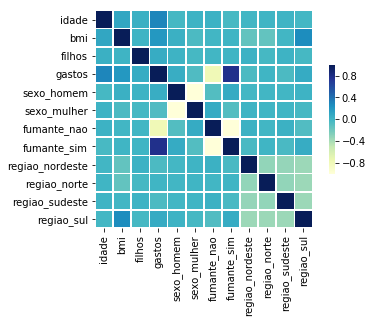

In [35]:
sns.heatmap(datasetfinal.corr(),cmap="YlGnBu",vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5})


#Variáveis escolhidas: idade, bmi, fumante e filhos.
#A presença de filhos na família, diferença de sexo ou região não apresentam impacto significativo na quantia média gasta 
#em hospitais de acordo com a análise dos dados. Porém, é sensato deduzir que um paciente que possua mais filhos tenha uma tendência
#a ter mais despesas hospitalares pelo fato da probabilidade de uma ocorrência médica aumentar.

#Como possível causa desse ''desencontro'' entre a análise de dados e as conclusões obtidas a partir da observação do mundo real,
#pode-se apontar o alto número pacientes no dataset que possuem 0 filhos (mostrado no Histograma acima).
#Sendo assim,o tamanho da amostra do estudo em questão pode
#não ter sido suficiente para que essa relação fosse aprendida pelo modelo. Porém é de responsabilidade do cientista 
#de dados analisar o mundo a sua volta e, se necessário, considerar importantes algumas variáveis que por alguma razão o modelo
#não considere. 


In [36]:
#Divisão do dataset (75% para dados de treino e 25% para dados de teste)
from sklearn.model_selection import train_test_split

x = datasetfinal.drop('gastos', axis = 1)
y = datasetfinal['gastos']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [37]:
#Criando o modelo de Regressão Linear

#Utilizando o pacote statsmodels para uma melhor visualização dos resultados do treinamento do modelo.
import statsmodels.formula.api as smf

#Antes de criar o modelo, é necessário juntar x_train e y_train
datasetmodelo1 = pd.concat([x_train, y_train], axis = 1)

modelo1 = smf.ols(formula='gastos ~ idade + bmi + fumante_sim + fumante_nao+filhos', data=datasetmodelo1).fit()

modelo1.summary()


#O modelo foi capaz de realizar as previsões no dataset de treino com 73,2% de precisão.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gastos   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     684.1
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          3.93e-284
Time:                        18:58:25   Log-Likelihood:                -10178.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     998   BIC:                         2.039e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6535.8034    395.308     16.533      0.000    5760.073    7311.534
idade        1.158e+04    646.661     17.907      0.000    1.03e+04    1.28e+04
bmi          1.165e+04   1172.280      9.941      0.000    9353.611     1.4e+04
fumante_sim  1.508e+04    345.950     43.591      0.000    1.44e+04    1.58e+04
fumante_nao -8544.3498    278.214    -30.711      0.000   -9090.301   -7998.399
filhos       2195.3923    812.508      2.702      0.007     600.973    3789.812
==============================================================================
Omnibus:                      248.424   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.655
Skew:                           1.305   Prob(JB):                    5.58e-134
Kurtosis:                       5.806   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#Realizando o teste do modelo com os dados de teste para verificar a real eficácia do modelo.

previsao = modelo1.predict(x_test)
real = y_test
comparativo = pd.concat([previsao, real], axis = 1)
comparativo = comparativo.rename(columns = {0:'previsto'})
comparativo.head()

,previsto,gastos
578,11450.148396,9724.53
610,9940.165518,8547.69
569,37773.680775,45702.02
1034,15852.522355,12950.07
198,6958.423941,9644.25


In [39]:
#Calculando a precisão do modelo

from sklearn import metrics
from sklearn.metrics import r2_score

print("MSE (erro médio) = %f" %metrics.mean_squared_error(real, previsao))
print("RMSE = %r" %np.sqrt(metrics.mean_squared_error(real, previsao)))

print("A precisão do modelo é de :%g" %r2_score(real, previsao))

MSE (erro médio) = 32231120.285502
RMSE = 5677.2458362750185
A precisão do modelo é de :0.795273


Text(0.5, 1.0, 'Histograma dos resíduos da previsão')

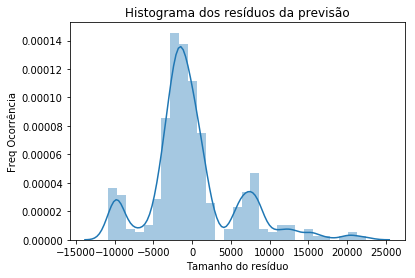

In [40]:
#Analisando a distribuição dos resíduos

sns.distplot((real-previsao))
plt.xlabel('Tamanho do resíduo')
plt.ylabel('Freq Ocorrência')
plt.title('Histograma dos resíduos da previsão')


#Os resíduos apresentam algumas características de uma distribuição normal (valores em volta da média), que seria o ideal no caso de um modelo preditivo preciso.
#Porém, pode-se perceber distorções dessa distribuição em valores outliers (para mais ou menos de 10000-15000 reais.)
#Sendo assim, será utilizado outro algoritmo para tentar realizar um modelo preditivo que realize as previsões de forma mais acertiva, de forma a reduzir a ocorrência destes valores extremos.

In [41]:
#Através da regressão linear, o modelo foi capaz de prever a despesa hospitalar de 335 pacientes com 79,5% de acurácia.

#Agora, será verificado a acurácia do modelo por meio de outro algoritmo: o RandomForest. O algoritmo RandomForest gera inúmeras
#árvores de decisão que depois são utilizadas para realizar tarefas de regressão com a maior acurácia possível.



In [42]:
#Criação do modelo preditivo utilizando o algoritmo RandomForest

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo com 20 árvores de decisão
modelo2 = RandomForestRegressor(n_estimators = 20, random_state = 42)

# Treinando o modelo com o dataset de treino com as variáveis importantes

modelo2.fit(x_train[['idade', 'bmi', 'filhos', 'fumante_sim', 'fumante_nao']], y_train)

#Calculando a precisão do modelo
R2 = modelo2.score(x_train[['idade', 'bmi', 'filhos', 'fumante_sim', 'fumante_nao']], y_train)

print("Nos dados de treino a precisão do modelo preditivo é de %g" %R2)

Nos dados de treino a precisão do modelo preditivo é de 0.967482


In [44]:
#Testando o modelo


previsao2 = modelo2.predict(x_test[['idade', 'bmi', 'filhos', 'fumante_sim', 'fumante_nao']])

print("MSE (erro médio) = %f" %metrics.mean_squared_error(y_test, previsao2))
print("RMSE = %r" %np.sqrt(metrics.mean_squared_error(y_test, previsao2)))

print("Nos dados de teste a precisão do modelo é de = %g" %r2_score(y_test, previsao2))


MSE (erro médio) = 23165296.545368
RMSE = 4813.034027031993
Nos dados de teste a precisão do modelo é de = 0.852858


-816.2344534328362

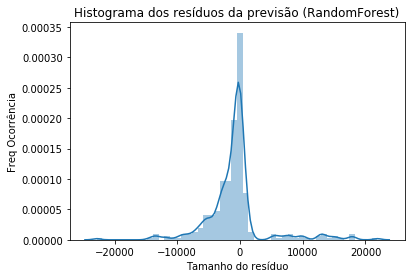

In [45]:
#Analisando a distribuição dos resíduos

sns.distplot((y_test-previsao2))
plt.xlabel('Tamanho do resíduo')
plt.ylabel('Freq Ocorrência')
plt.title('Histograma dos resíduos da previsão (RandomForest)')

(y_test-previsao2).mean()

In [46]:
#A diferença entre a distribuição dos resíduos é significativa. Utilizando o algoritmo RandomForest, os resíduos estão melhor
#distribuídos entre a média e os picos de 'distorção' foram drasticamente reduzidos. Somado ao fato de que o modelo2 apresentou
#precisão de 85,2%, podemos afirmar que o modelo preditivo feito através do algoritmo RandomForest é o mais indicado para
#a previsão de despesas hospitalares.